<a href="https://colab.research.google.com/github/zain-0/Salary-Prediction-Using-DNN/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))




Saving Data Salary Prediction.csv to Data Salary Prediction (1).csv
User uploaded file "Data Salary Prediction (1).csv" with length 196625 bytes


In [37]:
df = pd.read_csv("/content/Data Salary Prediction.csv")
df = df[df['DOJ'].notna()]
df = df[df['AGE'].notna()]
df = df[df['LEAVES REMAINING'].notna()]
df = df[df['LEAVES USED'].notna()]
df.reset_index(drop=True, inplace=True)


Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')


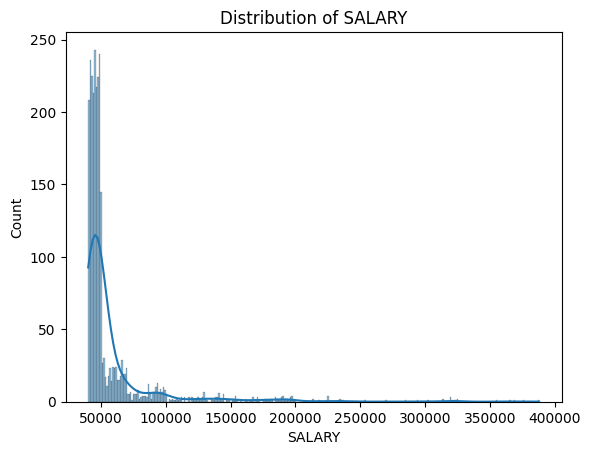

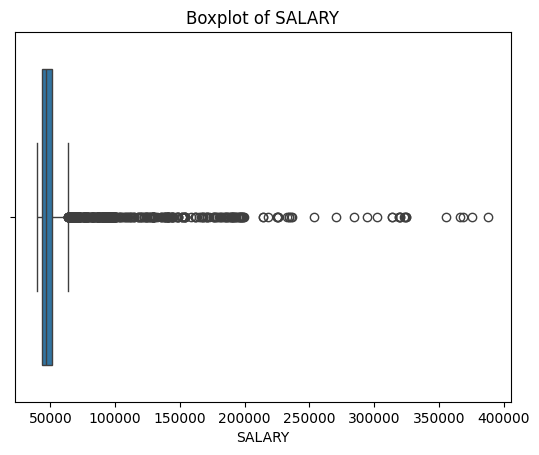

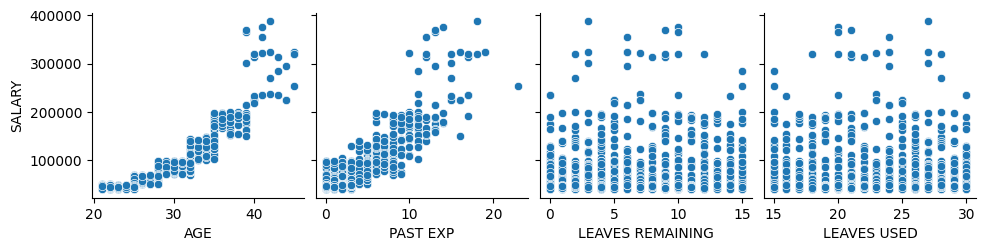

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first 10,000 rows of the DataFrame
df.head(10000)

# Check the number of missing values in the 'UNIT' column
df['UNIT'].isna().sum()

# Print the column names to check for 'DESIGNATION'
print(df.columns)

# One-hot encode 'DESIGNATION'
df = pd.get_dummies(df, columns=['DESIGNATION'], prefix='Desig')

# Various visualizations
sns.histplot(df['SALARY'], kde=True)
plt.title('Distribution of SALARY')
plt.show()

# Boxplot of SALARY
sns.boxplot(x=df['SALARY'])
plt.title('Boxplot of SALARY')
plt.show()

# Pair plot to visualize relationships between numerical features and 'SALARY'
sns.pairplot(df, x_vars=['AGE', 'PAST EXP', 'LEAVES REMAINING', 'LEAVES USED'], y_vars='SALARY', kind='scatter')
plt.show()



<ipython-input-39-8cd9ff2fb4ef>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


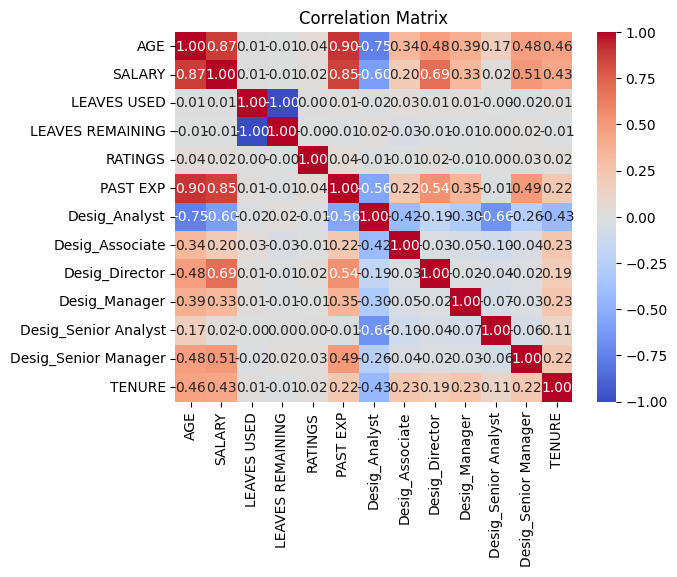

In [39]:
# Feature engineering: Calculate tenure based on date columns
df['DATE2'] = pd.to_datetime(df['CURRENT DATE'])
df['DATE1'] = pd.to_datetime(df['DOJ'])
df['TENURE'] = (df['DATE2'] - df['DATE1']).dt.days
df.drop(['DATE1', 'DATE2'], axis=1, inplace=True)

# Correlation analysis after feature engineering
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


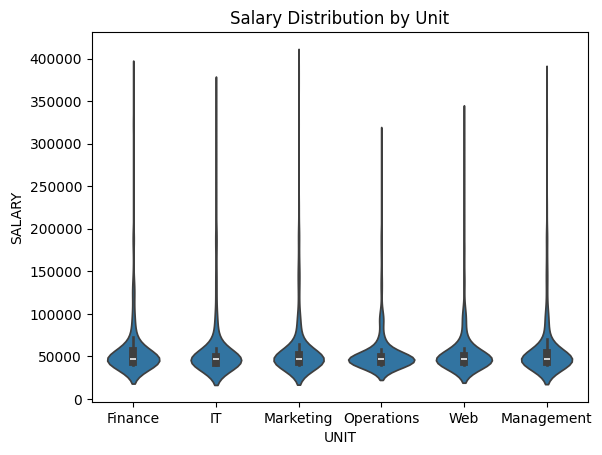

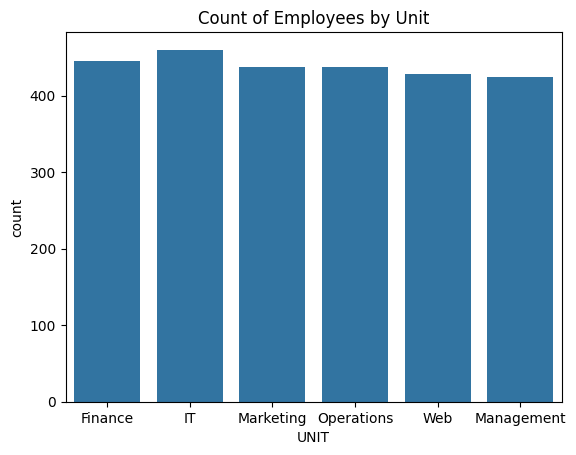

In [40]:
# Violin plot to show the distribution of 'SALARY' for different 'UNIT'
sns.violinplot(x='UNIT', y='SALARY', data=df)
plt.title('Salary Distribution by Unit')
plt.show()

# Count plot for the 'UNIT' column
sns.countplot(x='UNIT', data=df)
plt.title('Count of Employees by Unit')
plt.show()


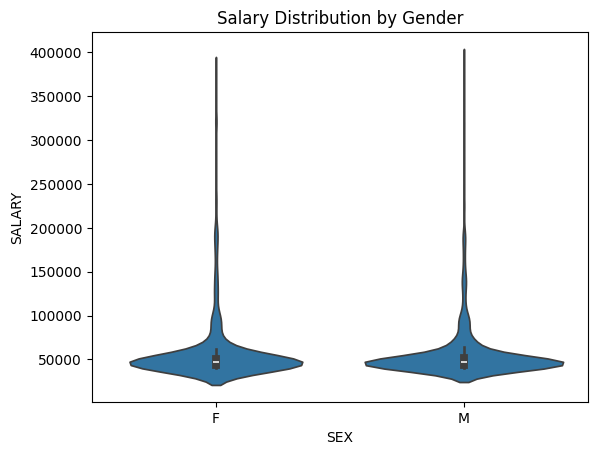

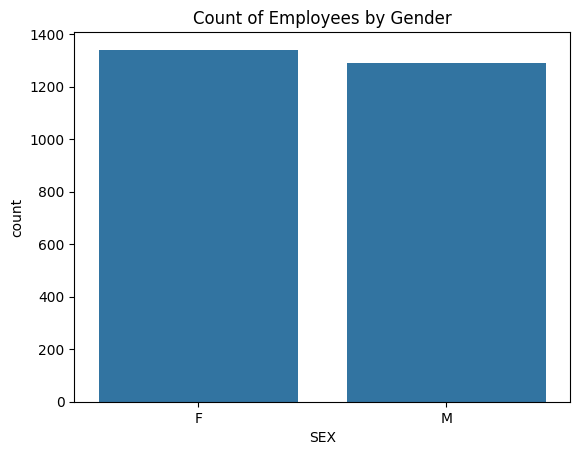

In [41]:
# Violin plot to show the distribution of 'SALARY' for different 'SEX'
sns.violinplot(x='SEX', y='SALARY', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# Count plot for the 'SEX' column
sns.countplot(x='SEX', data=df)
plt.title('Count of Employees by Gender')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

selected_features = ['TENURE', 'AGE', 'Desig_Analyst', 'PAST EXP', 'Desig_Associate', 'Desig_Director', 'Desig_Manager', 'Desig_Senior Analyst', 'Desig_Senior Manager']
X = df[selected_features]
Y = df['SALARY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras import regularizers
import tensorflow as tf

# Build the neural network model
model = Sequential([
    Dense(512, activation=LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation=LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation=LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation=LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation=LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['mae'])


In [51]:
# Train the model
model.fit(X_train, Y_train, epochs=250, batch_size=64, validation_split=0.1)

Epoch 1/250
60/60 [==============================] - 3s 10ms/step - loss: 3868337408.0000 - mae: 48105.8867 - val_loss: 1339934336.0000 - val_mae: 23539.7305
Epoch 2/250
60/60 [==============================] - 0s 7ms/step - loss: 2107516544.0000 - mae: 29547.1348 - val_loss: 1050872768.0000 - val_mae: 19896.2910
Epoch 3/250
60/60 [==============================] - 0s 7ms/step - loss: 1934024192.0000 - mae: 27426.4180 - val_loss: 1058087680.0000 - val_mae: 19895.0352
Epoch 4/250
60/60 [==============================] - 0s 7ms/step - loss: 1798142848.0000 - mae: 26718.4707 - val_loss: 970695872.0000 - val_mae: 19181.4375
Epoch 5/250
60/60 [==============================] - 0s 7ms/step - loss: 1767954176.0000 - mae: 26416.3496 - val_loss: 884792128.0000 - val_mae: 18893.5996
Epoch 6/250
60/60 [==============================] - 0s 7ms/step - loss: 1695465856.0000 - mae: 26019.8809 - val_loss: 862190528.0000 - val_mae: 18654.5488
Epoch 7/250
60/60 [==============================] - 0s 7ms/

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Model evaluation
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)


print(f'\nMean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')



17/17 [==============================] - 0s 2ms/step

Mean Absolute Error: 7704.8797067718215
Mean Squared Error: 181785588.8683286
Root Mean Squared Error: 13482.788616170195


In [45]:
# 6 Layers 512 (6668, alpha= 0.001, batch size = 32, No Early Stoppage)
# 8 Layers 2048 (13800, alpha= 0.001, batch size = 32, No Early Stoppage)